In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style='white')

In [0]:
data = pd.read_csv('query (6).csv')

In [0]:
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2019-11-06T20:52:55.193Z,14.8684,122.7430,10.00,5.7,mww,NaN,49.0,8.062,1.02,us,us7000645k,2019-11-07T03:13:52.040Z,"43km ENE of Jomalig, Philippines",earthquake,8.3,1.8,0.078,16.0,reviewed,us,us
1,2019-11-04T14:50:06.938Z,14.6051,119.9073,35.00,4.9,mb,NaN,106.0,8.676,0.95,us,us700062w8,2019-11-06T21:14:25.512Z,"38km WSW of Sabang, Philippines",earthquake,9.1,2.0,0.051,119.0,reviewed,us,us
2,2019-11-03T18:42:09.097Z,6.2027,123.9850,549.51,4.5,mb,NaN,119.0,5.554,0.75,us,us700062m6,2019-11-03T20:26:14.040Z,"22km W of Palimbang, Philippines",earthquake,10.8,14.7,0.163,11.0,reviewed,us,us
3,2019-11-03T14:42:20.622Z,5.7762,127.0649,53.28,4.7,mb,NaN,45.0,1.957,0.78,us,us700062jz,2019-11-03T17:24:30.040Z,"117km ESE of Pondaguitan, Philippines",earthquake,7.6,7.2,0.063,77.0,reviewed,us,us
4,2019-11-01T18:38:36.781Z,6.8182,125.0826,13.57,4.9,mb,NaN,76.0,0.552,0.71,us,us7000623t,2019-11-02T19:04:08.040Z,"12km WNW of Magsaysay, Philippines",earthquake,5.3,4.9,0.064,78.0,reviewed,us,us


### Pivot Data For Bar Chart Race

In [0]:
data_m5 = pd.read_csv('query (7).csv')
data_m5.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2019-10-31T01:11:19.120Z,6.9098,125.1559,10.00,6.5,mww,NaN,19.0,0.449,0.75,us,us700061e9,2019-11-06T21:13:07.648Z,"0km NW of Bulatukan, Philippines",earthquake,6.0,1.7,0.048,42.0,reviewed,us,us
1,2019-10-29T01:04:44.738Z,6.8016,125.0401,15.32,6.6,mww,NaN,31.0,0.597,1.27,us,us6000645n,2019-11-03T03:23:21.384Z,"14km E of Bual, Philippines",earthquake,5.3,2.8,0.043,52.0,reviewed,us,us
2,2019-10-16T11:37:06.046Z,6.7124,125.0046,14.12,6.4,mww,NaN,33.0,0.671,0.86,us,us70005ulm,2019-10-30T20:18:54.842Z,"7km ENE of Columbio, Philippines",earthquake,6.3,3.8,0.055,32.0,reviewed,us,us
3,2019-09-29T02:02:51.935Z,5.6929,126.5495,73.00,6.2,mww,NaN,16.0,1.673,1.30,us,us70005nbb,2019-10-25T23:18:20.792Z,"84km SSE of Pondaguitan, Philippines",earthquake,2.6,1.8,0.041,58.0,reviewed,us,us
4,2019-07-26T23:37:58.444Z,20.8373,121.9744,9.00,6.0,mww,NaN,23.0,2.138,0.75,us,us60004w8x,2019-10-11T20:12:37.040Z,"14km ENE of Itbayat, Philippines",earthquake,6.4,1.7,0.055,32.0,reviewed,us,us


In [0]:
data_m5['time'] = pd.to_datetime(data_m5['time'])
data_m5['ph_loc'] = data_m5.place.str.split(', ').apply(lambda x: x[0])
data_m5['year'] = data_m5.time.dt.year
data_m5.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,ph_loc,year
0,2019-10-31 01:11:19.120000+00:00,6.9098,125.1559,10.00,6.5,mww,NaN,19.0,0.449,0.75,us,us700061e9,2019-11-06T21:13:07.648Z,"0km NW of Bulatukan, Philippines",earthquake,6.0,1.7,0.048,42.0,reviewed,us,us,0km NW of Bulatukan,2019
1,2019-10-29 01:04:44.738000+00:00,6.8016,125.0401,15.32,6.6,mww,NaN,31.0,0.597,1.27,us,us6000645n,2019-11-03T03:23:21.384Z,"14km E of Bual, Philippines",earthquake,5.3,2.8,0.043,52.0,reviewed,us,us,14km E of Bual,2019
2,2019-10-16 11:37:06.046000+00:00,6.7124,125.0046,14.12,6.4,mww,NaN,33.0,0.671,0.86,us,us70005ulm,2019-10-30T20:18:54.842Z,"7km ENE of Columbio, Philippines",earthquake,6.3,3.8,0.055,32.0,reviewed,us,us,7km ENE of Columbio,2019
3,2019-09-29 02:02:51.935000+00:00,5.6929,126.5495,73.00,6.2,mww,NaN,16.0,1.673,1.30,us,us70005nbb,2019-10-25T23:18:20.792Z,"84km SSE of Pondaguitan, Philippines",earthquake,2.6,1.8,0.041,58.0,reviewed,us,us,84km SSE of Pondaguitan,2019
4,2019-07-26 23:37:58.444000+00:00,20.8373,121.9744,9.00,6.0,mww,NaN,23.0,2.138,0.75,us,us60004w8x,2019-10-11T20:12:37.040Z,"14km ENE of Itbayat, Philippines",earthquake,6.4,1.7,0.055,32.0,reviewed,us,us,14km ENE of Itbayat,2019


In [0]:
data_m5 = data_m5.sort_values('time', ascending=True)
data_m5['eq_count'] = data_m5.groupby('ph_loc').cumcount().fillna(0)

In [0]:
data_m5.head(20)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,ph_loc,year,eq_count
304,1961-06-19 01:45:24+00:00,12.520,121.886,25.0,6.0,mw,NaN,NaN,NaN,NaN,iscgem,iscgem17290472,2015-05-13T18:52:55.000Z,"Mindoro, Philippines",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,Mindoro,1961,0
303,1962-03-11 19:19:10+00:00,8.851,126.586,44.6,6.3,mw,NaN,NaN,NaN,NaN,iscgem,iscgem874348,2015-05-13T18:52:56.000Z,"Mindanao, Philippines",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,Mindanao,1962,0
302,1962-08-17 05:04:32+00:00,10.478,121.604,20.0,6.0,mw,NaN,NaN,NaN,NaN,iscgem,iscgem17292251,2015-05-13T18:52:56.000Z,"Panay, Philippines",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,Panay,1962,0
301,1963-01-24 22:27:33+00:00,8.000,126.864,50.0,6.0,mw,NaN,NaN,NaN,NaN,iscgem,iscgem871735,2015-05-13T18:52:56.000Z,"Mindanao, Philippines",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,Mindanao,1963,1
300,1963-06-06 05:18:56+00:00,19.896,120.572,24.8,6.0,mw,NaN,NaN,NaN,NaN,iscgem,iscgem872470,2015-05-13T18:52:57.000Z,"Babuyan Islands region, Philippines",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,Babuyan Islands region,1963,0
299,1963-06-19 09:09:04+00:00,4.588,126.540,65.0,6.1,mw,NaN,NaN,NaN,NaN,iscgem,iscgem872542,2015-05-13T18:52:57.000Z,"Kepulauan Talaud, Indonesia",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,Kepulauan Talaud,1963,0
298,1964-06-10 22:16:40+00:00,5.031,127.340,92.5,6.0,mw,NaN,NaN,NaN,NaN,iscgemsup,iscgemsup866709,2015-07-13T17:02:23.000Z,Philippine Islands region,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,Philippine Islands region,1964,0
297,1964-11-24 12:40:59+00:00,13.023,124.683,35.0,6.3,mw,NaN,NaN,NaN,NaN,iscgem,iscgem863013,2015-05-13T18:52:58.000Z,"Catanduanes, Philippines",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,Catanduanes,1964,0
296,1965-04-26 22:15:45+00:00,21.045,120.798,37.1,6.1,mw,NaN,NaN,NaN,NaN,iscgem,iscgem858053,2015-05-13T18:52:59.000Z,Taiwan region,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,Taiwan region,1965,0
295,1965-06-22 23:48:07+00:00,7.175,123.613,40.0,6.3,mw,NaN,NaN,NaN,NaN,iscgem,iscgem856343,2015-05-13T18:52:59.000Z,"Mindanao, Philippines",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,Mindanao,1965,2


In [0]:
crosstab = pd.crosstab(data_m5['ph_loc'], [data_m5['year']], values=data_m5['eq_count'], aggfunc=max).apply(lambda x: x+1)

In [0]:
# Reformat data to fillforward for empty years
crosstab_new = crosstab.T.fillna(method='ffill').fillna(0).T.drop([i for i in range(2013, 2020)], axis=1)

In [0]:
crosstab_reset = crosstab_new.reset_index()
crosstab_reset.to_csv('ph_only_eqv2.csv', index=False)

In [0]:
crosstab.sum(axis=0)

year
1961      0.0
1962      0.0
1963      1.0
1964      0.0
1965      5.0
1966      8.0
1967      0.0
1968     15.0
1969      7.0
1970     28.0
1971      8.0
1972     40.0
1973     22.0
1974      7.0
1975     40.0
1976     41.0
1977     23.0
1978     52.0
1979     48.0
1980     51.0
1981     29.0
1982      8.0
1983     53.0
1984     42.0
1985     64.0
1986     66.0
1987    102.0
1988     73.0
1989     77.0
1990     85.0
1991     66.0
1992     87.0
1993     73.0
1994     38.0
1995     85.0
1996    125.0
1997    125.0
1998    107.0
1999    113.0
2000    113.0
2001     84.0
2002    112.0
2003     83.0
2004     40.0
2005     97.0
2006     30.0
2007    117.0
2008    161.0
2009    132.0
2010    113.0
2011     65.0
2012    133.0
2013      0.0
2014      0.0
2015      0.0
2016      0.0
2017      0.0
2018      0.0
2019      0.0
dtype: float64

# Back to Forecasting

In [0]:
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,ph_loc
time,,,,,,,,,,,,,,,,,,,,,,,
1979-11-12 14:46:47.800,1979-11-12 14:46:47.800,9.752,125.935,106.0,5.0,mb,NaN,NaN,NaN,NaN,us,usp00013zh,2014-11-06T23:22:07.291Z,"Mindanao, Philippines",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,Mindanao
1979-11-18 15:59:20.500,1979-11-18 15:59:20.500,11.327,125.690,43.0,5.0,mb,NaN,NaN,NaN,NaN,us,usp000142w,2014-11-06T23:22:07.455Z,"Samar, Philippines",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,Samar
1979-11-19 22:17:20.200,1979-11-19 22:17:20.200,5.861,125.295,85.0,6.1,mb,NaN,NaN,NaN,NaN,us,usp000143h,2017-04-26T17:33:21.081Z,"Mindanao, Philippines",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,Mindanao
1979-11-21 22:59:05.300,1979-11-21 22:59:05.300,5.571,127.016,63.0,4.8,mb,NaN,NaN,NaN,NaN,us,usp000144d,2014-11-06T23:22:07.650Z,Philippine Islands region,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,Philippine Islands region
1979-11-22 18:39:07.600,1979-11-22 18:39:07.600,16.339,121.586,33.0,4.8,mb,NaN,NaN,NaN,NaN,us,usp000144w,2014-11-06T23:22:07.681Z,"Luzon, Philippines",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,Luzon


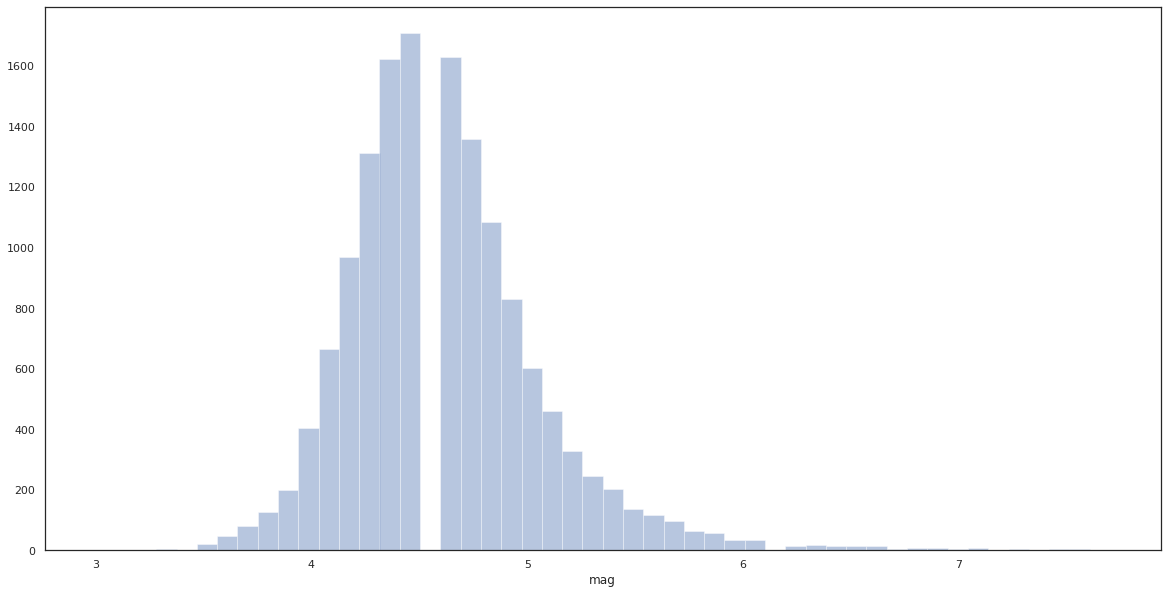

In [0]:
plt.subplots(figsize=(20, 10))
sns.distplot(data.mag, kde=False)

In [0]:
# Convert time to datetime
data['time'] = pd.to_datetime(data['time']).dt.tz_convert(None)

In [0]:
# Set date as index then sort
data.index = data['time']

data = data.sort_index()

In [0]:
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
time,,,,,,,,,,,,,,,,,,,,,,
1979-11-12 14:46:47.800,1979-11-12 14:46:47.800,9.752,125.935,106.0,5.0,mb,NaN,NaN,NaN,NaN,us,usp00013zh,2014-11-06T23:22:07.291Z,"Mindanao, Philippines",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
1979-11-18 15:59:20.500,1979-11-18 15:59:20.500,11.327,125.690,43.0,5.0,mb,NaN,NaN,NaN,NaN,us,usp000142w,2014-11-06T23:22:07.455Z,"Samar, Philippines",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
1979-11-19 22:17:20.200,1979-11-19 22:17:20.200,5.861,125.295,85.0,6.1,mb,NaN,NaN,NaN,NaN,us,usp000143h,2017-04-26T17:33:21.081Z,"Mindanao, Philippines",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
1979-11-21 22:59:05.300,1979-11-21 22:59:05.300,5.571,127.016,63.0,4.8,mb,NaN,NaN,NaN,NaN,us,usp000144d,2014-11-06T23:22:07.650Z,Philippine Islands region,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
1979-11-22 18:39:07.600,1979-11-22 18:39:07.600,16.339,121.586,33.0,4.8,mb,NaN,NaN,NaN,NaN,us,usp000144w,2014-11-06T23:22:07.681Z,"Luzon, Philippines",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us


In [0]:
s = data['mag'].resample('D').max()
s

time
1979-11-12    5.0
1979-11-13    NaN
1979-11-14    NaN
1979-11-15    NaN
1979-11-16    NaN
             ... 
2019-11-02    NaN
2019-11-03    4.7
2019-11-04    4.9
2019-11-05    NaN
2019-11-06    5.7
Freq: D, Name: mag, Length: 14605, dtype: float64

# Forecast using Prophet

In [0]:
# !pip install fbprophet

In [0]:
# Load Prophet
from fbprophet import Prophet

In [0]:
df = s.reset_index()

In [0]:
# Reassign columns as input to Prophet
yn_df = pd.DataFrame(df)
yn_df['y'] = yn_df['mag']
yn_df['ds'] = s.index
yn_df.index = yn_df.time

In [0]:
yn_df.head()

,time,mag,y,ds
time,,,,
1979-11-12,1979-11-12,5.0,5.0,1979-11-12
1979-11-13,1979-11-13,NaN,NaN,1979-11-13
1979-11-14,1979-11-14,NaN,NaN,1979-11-14
1979-11-15,1979-11-15,NaN,NaN,1979-11-15
1979-11-16,1979-11-16,NaN,NaN,1979-11-16


In [0]:
# Let's treat data before 2018 as train data and forecast for beyond 2018 as test data
date_split = '2018-05-01'
train, test = yn_df[:date_split], yn_df[date_split:]

In [0]:
train.shape, test.shape

((14051, 4), (555, 4))

In [0]:
# Forecast for how many weeks?

days = 60 # 1 month forecast
m = Prophet(yearly_seasonality = True, weekly_seasonality=True, seasonality_prior_scale=0.1, )

# Let's train the model
m.fit(train)
future = m.make_future_dataframe(periods=(test.shape[0]+(days)))
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


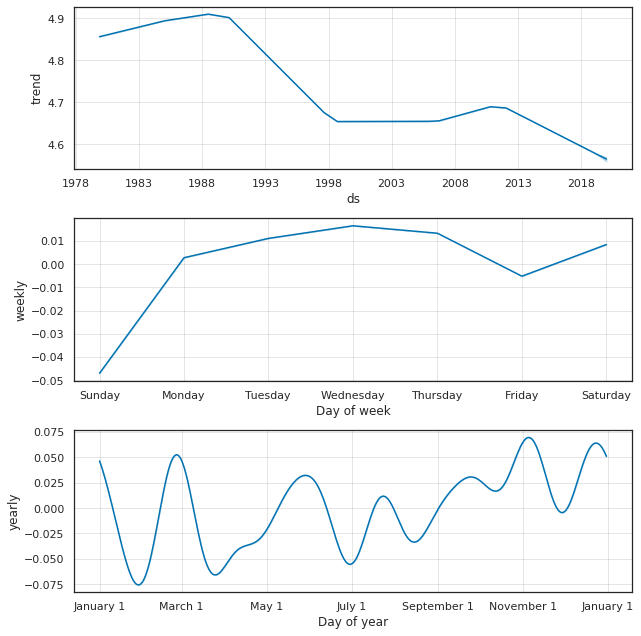

In [0]:
m.plot_components(forecast)
plt.show()

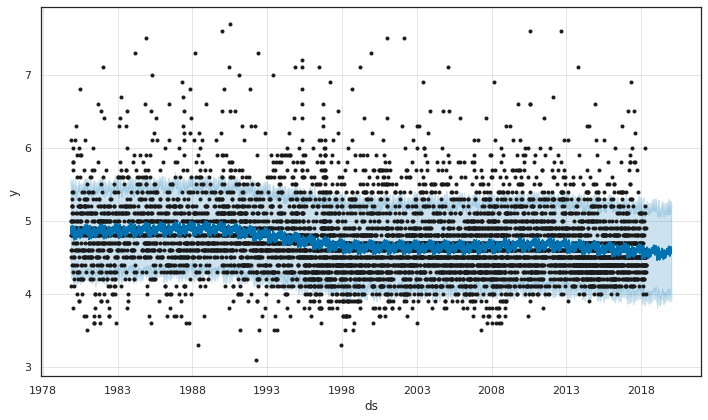

In [0]:
m.plot(forecast)
plt.show()

In [0]:
test_df = pd.merge(forecast.set_index('ds')[date_split:].reset_index(), test, on='ds', how='left')
test_df.index = test_df['ds']

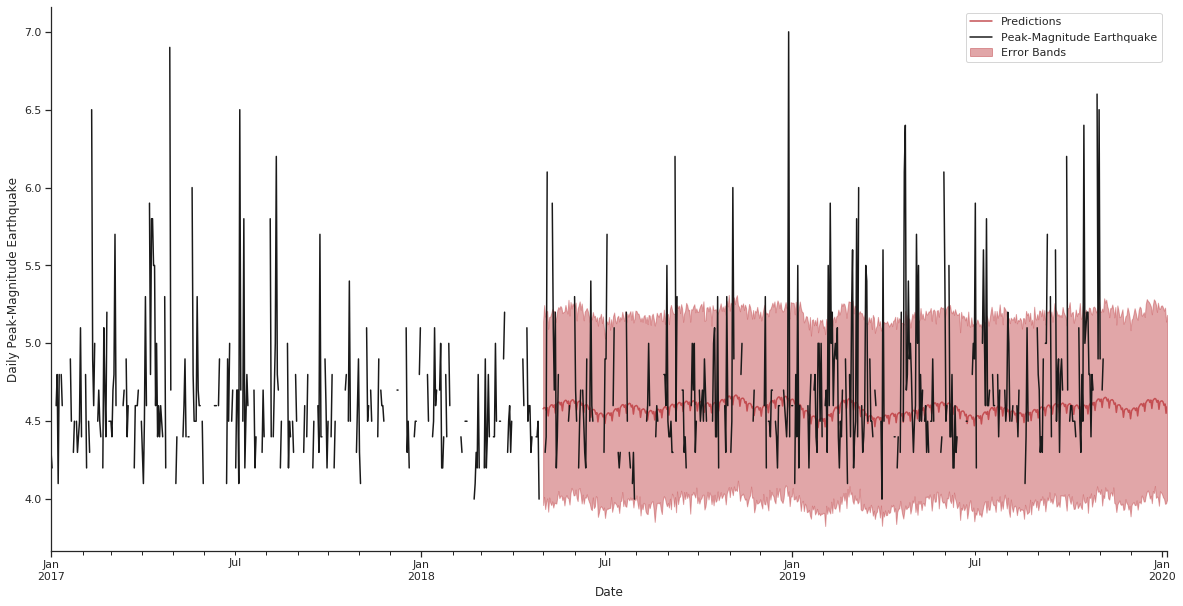

In [0]:
pd.plotting.register_matplotlib_converters()

ax = test_df.yhat.plot(figsize=(20, 10), color='r')

yn_df['2017-01-01':].y.plot(ax=ax, color='k')
# test_df.yhat.plot(ax=ax, style='--', color='r')

ax.fill_between(test_df.index,
                test_df.yhat_lower,
                test_df.yhat_upper, color='r', alpha=.5)
ax.set_xlabel('Date')
ax.set_ylabel('Daily Peak-Magnitude Earthquake')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(['Test', 'Training'])

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


plt.legend(['Predictions', 'Peak-Magnitude Earthquake', 'Error Bands'])
plt.show()
